In [19]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import descartes
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx

%matplotlib inline


In [20]:
ufo_map = gpd.read_file('geopandas-tutorial/data/usa-states-census-2014.shp')


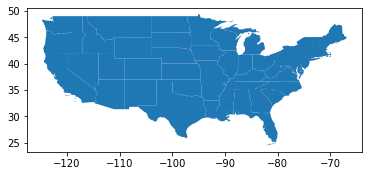

In [21]:
ufo_map.plot()

In [28]:
#Read in alien data and add basemap layer 

alien_df = pd.read_csv('../project-1-alien-analysis/alien_region.csv')
crs = {'init': 'epsg:4326'}

alien_df.head()

/Users/mecross/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year,region
0,0,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,Midwest
1,1,10/10/1998 13:15,elgin,il,us,cylinder,1800,30 +/- min,While looking up at sky I noticed a bright lig...,11/1/1998,42.037222,-88.281111,10,10,13:15,1998,Midwest
2,2,10/10/2004 15:00,rock island,il,us,sphere,3600,1 hour,The sky was clear and the objects at times ap...,10/27/2004,41.509444,-90.578611,10,10,15:00,2004,Midwest
3,3,10/10/2010 20:45,sterling,il,us,cylinder,600,10min,It had rows of white lights with red lights pu...,11/21/2010,41.788611,-89.696111,10,10,20:45,2010,Midwest
4,4,10/10/2012 20:30,marion,il,us,light,240,2 to 4 minutes,I was leaving my friend&#39s house to go home....,10/30/2012,37.730556,-88.933056,10,10,20:30,2012,Midwest


In [64]:
#Drop Hawaii and Alaska values 
alien_df_map = alien_df.loc[(alien_df['state'] != 'hi') & (alien_df['state'] != 'ak') ]

#Checking for colorado data as it doesn't plot on map 
colorado_df = alien_df.loc[(alien_df['state'] == 'co')]
colorado_df.head()


,Unnamed: 0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year,region
50688,50688,10/10/2007 04:00,denver,co,us,changing,2700,45 minutes+,Huge lighted cluster in the eastern sky. ((NU...,11/28/2007,39.739167,-104.984167,10,10,04:00,2007,West
50689,50689,10/10/2007 22:00,fleming,co,us,circle,600,10 minutes,UFO SPOTTED&#44 FLEMING COLORADO,11/28/2007,40.680000,-102.838889,10,10,22:00,2007,West
50690,50690,10/10/2007 23:05,northglenn,co,us,triangle,15,15 seconds,Hovering triangular shape seen with flashing l...,11/28/2007,39.885556,-104.986667,10,10,23:05,2007,West
50691,50691,10/10/2008 20:40,pueblo,co,us,light,300,5 minutes,In the northwest sky&#44 there were about seve...,10/31/2008,38.254444,-104.608611,10,10,20:40,2008,West
50692,50692,10/10/2009 12:00,crested butte,co,us,egg,60,1min,metallic egg shaped craft above crested butte&...,12/12/2009,38.869722,-106.987222,10,10,12:00,2009,West


In [49]:
#Create points for latitude and longitude 
geometry = [Point(xy) for xy in zip(alien_df_map["longitude "], alien_df_map["latitude"])]
geometry[:3]

In [61]:
#Use points to create GeoDataFrame 
geo_alien_df = gpd.GeoDataFrame(alien_df_map, 
                              crs = crs, #specifying coordinate reference system
                              geometry = geometry) #specify geometry list we've created

geo_alien_df.head()

geo_alien_co = geo_alien_df.loc[(alien_df['state'] == 'co')]



Unnamed: 0              2648
datetime                2648
city                    2648
state                   2648
country                 2648
shape                   2596
duration (seconds)      2648
duration (hours/min)    2648
comments                2648
date posted             2648
latitude                2648
longitude               2648
Month                   2648
Day                     2648
Time                    2648
Year                    2648
region                  2648
geometry                2648
dtype: int64

No handles with labels found to put in legend.


(-127.6146362, -64.0610978, 23.253819649999997, 50.628669349999996)

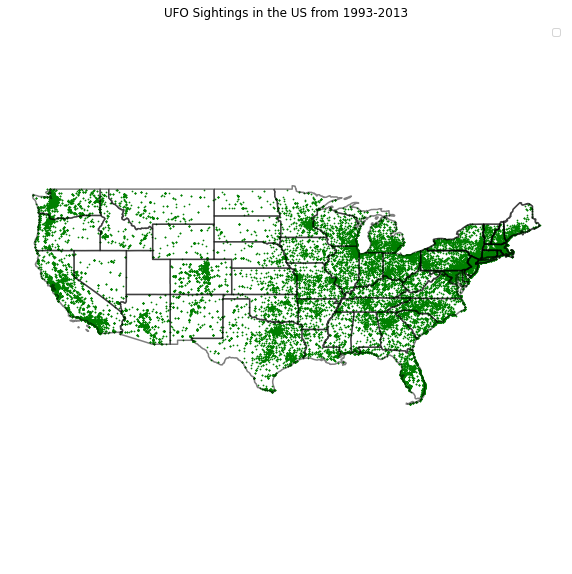

In [63]:
#Map of sightings from 1993-2013

fig,ax = plt.subplots()
fig.set_size_inches((10, 10))
ufo_map.boundary.plot(color='black', ax = ax, alpha=0.5)
geo_alien_df.plot(ax = ax, color ="green", markersize = 0.5)
plt.legend(prop={'size': 10})

ax.set(title='UFO Sightings in the US from 1993-2013')
ax.set_axis_off()
plt.axis('equal')
#plt.savefig('US Sightings of UFOs from 1993-2013')